**Data collection**

In [ ]:
import nltk.sentiment
import pandas as pd
import numpy as np
df = pd.read_csv("twitter_training.csv")
col_name = ["TweetID","Topic","Category","Text"]
df.columns=col_name
print(df)

       TweetID        Topic  Category  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
53821     2048   CallOfDuty  Negative   
53822     2048   CallOfDuty  Negative   
53823     2048   CallOfDuty  Negative   
53824     2048   CallOfDuty  Negative   
53825     2049   CallOfDuty  Negative   

                                                    Text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
53821  @ CfDuty fix their game new omg challenge with...  
53822  @CallofDuty fix your game ne

**Data preprocessing**


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
# Download the 'stopwords' resource
nltk.download('stopwords')
def preprocess_text(Text):
    if pd.isnull(Text):
        return ''
    Text = re.sub(r'http\S+', '', Text)  # Remove URLs
    Text = re.sub(r'@\w+', '', Text)     # Remove mentions
    Text = re.sub(r'#', '', Text)        # Remove hashtags symbol
    Text = re.sub(r'\d+', '', Text)      # Remove digits
    Text = re.sub(r'\W+', ' ', Text)     # Remove non-word characters
    Text = Text.lower()                  # Convert to lowercase
    Text = ' '.join([word for word in Text.split() if word not in stopwords.words('english')])
    return Text

if 'Text' in df.columns:
    df['cleaned_text'] = df['Text'].apply(preprocess_text)
    print("Text preprocessing completed successfully!")
else:
    raise ValueError("The dataset does not contain a 'Text' column")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text preprocessing completed successfully!


**Data visualizaton**

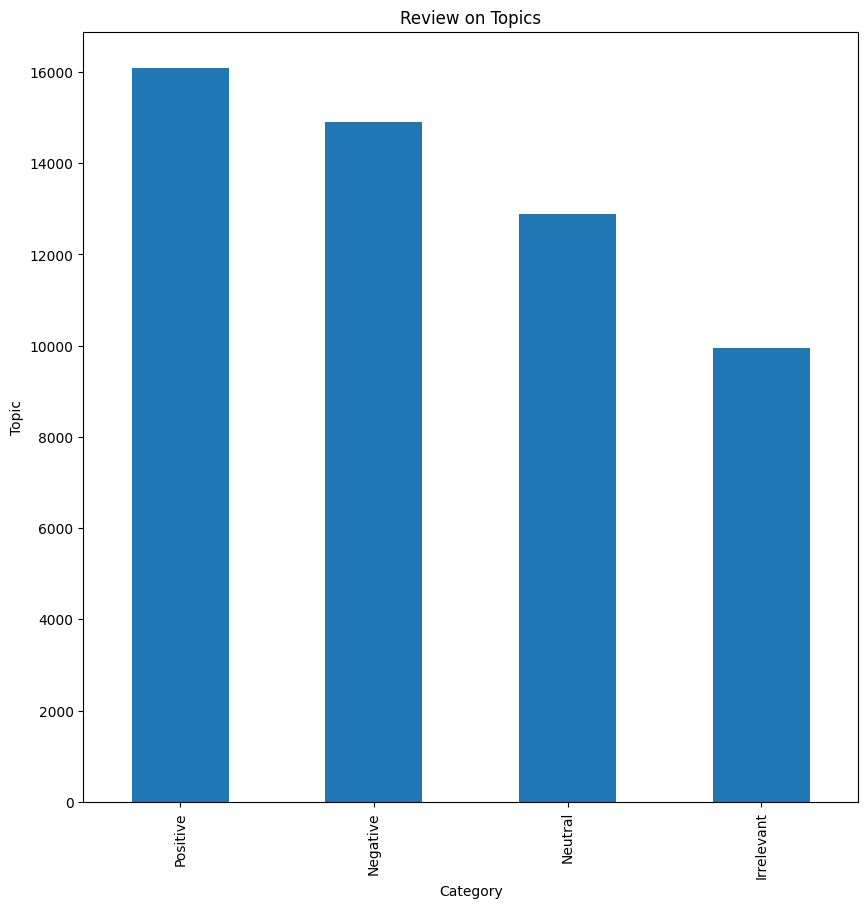

In [ ]:
import matplotlib.pyplot as plt
df['Category'].value_counts().plot(kind='bar',title='Review on Topics',figsize=(10,10))
plt.show()

**Sentiment analysis**

In [ ]:
from nltk.tokenize import sent_tokenize
Ex=df['Text'][100]
print(Ex)

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(Ex)
polarity_scores = sia.polarity_scores(Ex)
print(polarity_scores)
# .....


Grounded almost was pretty cool even despite the top tier unfunny writing until we became yet another annoying crafting game. I seriously can’t wait on this shitty trend to die


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.344, 'neu': 0.535, 'pos': 0.121, 'compound': -0.8475}


In [ ]:
res={}
for i,row in tqdm(df.iterrows(), total=len(df)):
   text = row['Text']
   topic = row['Topic']
   if isinstance(text, str):
       res[topic] = sia.polarity_scores(text)
   else:
       # Handle NaN or other non-string values
       res[topic] = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
   # Using a tuple (immutable)
# combined_result = (topic, sia.polarity_scores(text))

print(res[topic])

# # Using a dictionary (flexible)
# combined_result = {"tweet_id": tweetid, "sentiment_score": sia.polarity_scores(text)}
# pd.DataFrame(combined_result)



100%|██████████| 53826/53826 [00:21<00:00, 2487.86it/s]

{'neg': 0.048, 'neu': 0.803, 'pos': 0.149, 'compound': 0.3612}


In [ ]:
res


{'Borderlands': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'CallOfDutyBlackopsColdWar': {'neg': 0.0,
  'neu': 0.4,
  'pos': 0.6,
  'compound': 0.4588},
 'Amazon': {'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'compound': 0.5574},
 'Overwatch': {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.5106},
 'Xbox(Xseries)': {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859},
 'NBA2K': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Dota2': {'neg': 0.0, 'neu': 0.497, 'pos': 0.503, 'compound': 0.7243},
 'PlayStation5(PS5)': {'neg': 0.101,
  'neu': 0.627,
  'pos': 0.272,
  'compound': 0.6242},
 'WorldOfCraft': {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.5423},
 'CS-GO': {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.6154},
 'Google': {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263},
 'AssassinsCreed': {'neg': 0.886,
  'neu': 0.114,
  'pos': 0.0,
  'compound': -0.8316},
 'ApexLegends': {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.T.reset_index().rename(columns={'index': 'Topic'})
vaders = vaders.merge(df, how='left')
print(vaders)

      Topic  Borderlands  CallOfDutyBlackopsColdWar  Amazon  Overwatch  \
0       neg          0.0                     0.0000  0.0000     0.1800   
1       neu          1.0                     0.4000  0.5210     0.8200   
2       pos          0.0                     0.6000  0.4790     0.0000   
3  compound          0.0                     0.4588  0.5574    -0.5106   

   Xbox(Xseries)  NBA2K   Dota2  PlayStation5(PS5)  WorldOfCraft  ...  \
0         0.0000    0.0  0.0000             0.1010        0.2000  ...   
1         0.7030    1.0  0.4970             0.6270        0.8000  ...   
2         0.2970    0.0  0.5030             0.2720        0.0000  ...   
3         0.5859    0.0  0.7243             0.6242       -0.5423  ...   

   PlayerUnknownsBattlegrounds(PUBG)  Verizon  HomeDepot    FIFA  \
0                             0.0850   0.1410     0.0000  0.1520   
1                             0.8700   0.8170     0.5800  0.6810   
2                             0.0440   0.0430     0.4200  0

**Sentiment analysis visualization**

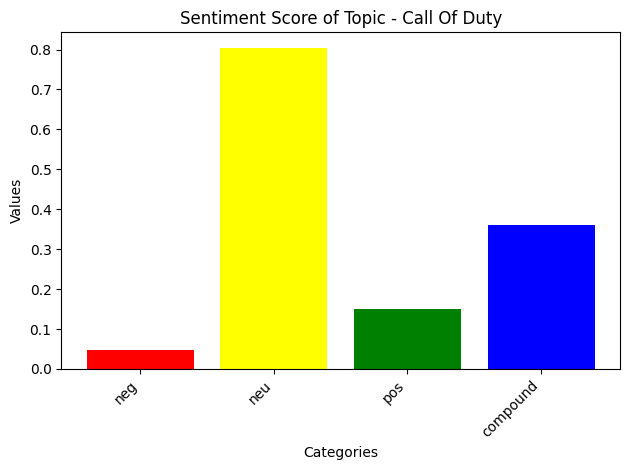

In [ ]:
categories = ['CallOfDuty']
values = vaders['Topic'].tolist() # Get the list of topics
colors = ['red','yellow','green','blue']

# Convert the values to numeric type, handling potential NaN values
numeric_values = pd.to_numeric(vaders[categories].iloc[:, 0], errors='coerce').fillna(0).tolist()

plt.bar(values, numeric_values, color=colors)
plt.title('Sentiment Score of Topic - Call Of Duty')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

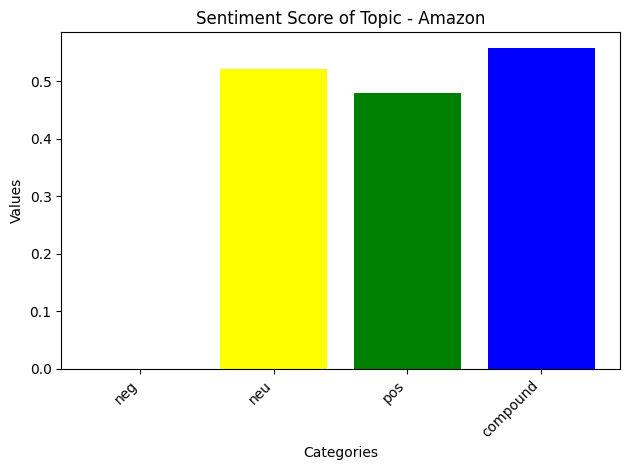

In [ ]:
categories = ['Amazon']
values = vaders['Topic'].tolist() # Get the list of topics
colors = ['red','yellow','green','blue']

# Convert the values to numeric type, handling potential NaN values
numeric_values = pd.to_numeric(vaders[categories].iloc[:, 0], errors='coerce').fillna(0).tolist()

plt.bar(values, numeric_values, color=colors)
plt.title('Sentiment Score of Topic - Amazon')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()